### Gather

In [1]:
import pandas as pd
import numpy as np
import json
import requests as r
import matplotlib.pyplot as plt
%matplotlib inline

**Import WeRateDogs Twitter archive**

In [2]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

**Download tweet image predictions**

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
df_image_predictions  = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Import JSON tweet data for retweet count and like data**

In [4]:
tweet_list=[]

with open('tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_dictionary = {'tweet_id': data['id'],'retweet_count': data['retweet_count'],'favorite_count': data['favorite_count']}
        tweet_list.append(tweet_dictionary)

df_tweet_extras = pd.DataFrame(tweet_list)

df_tweet_extras

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Assess

In [5]:
df_tweets.shape

(2356, 17)

In [6]:
df_image_predictions.shape

(2075, 12)

In [7]:
df_tweet_extras.shape

(2354, 3)

In [8]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- **Some dog names include text like "such", "a" "an".**
- **Retweeted data may need to be removed from dataset/or moved into a separate table.**
- **Dog stages of dogg, floofer, pupper, and puppo should be collapsed into one column.**

In [9]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- **Vague header meanings.**
- **Some p1 predictions are not dogs - the dog prediction may be p2 or p3**

In [10]:
df_tweet_extras

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [11]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- **Timestamp columns are not datetime format**

In [12]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_tweet_extras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
# This code block and the following value_counts codeblock are just confirming that the data 
# type of the id fields are floats
df_tweets['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [15]:
df_tweets['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [16]:
df_tweets['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [17]:
df_tweets['retweeted_status_user_id'].value_counts().sum()

181

- **Retweeted and In Reply columns should be integers and not floats**

In [18]:
df_tweets['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- **The source column includes links for sources that could be more simply represented as either "Twitter for iPhone", "Vine", "Twitter Web Client", or "Tweet Deck"**

In [19]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_image_predictions[df_image_predictions.p2_conf > df_image_predictions.p1_conf]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
df_image_predictions[df_image_predictions.p2_conf == df_image_predictions.p2_conf.min()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


- **Tweet 106 does not have a dog breed identified through image classification. This may be the case for other tweets too** 
(I ultimately chose not the address this in the cleaning steps, but wanted to keep this observation here just in case I want to revist this dataset for future personal projects).

In [23]:
df_tweet_extras.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [24]:
# Checking to see if any rows have no stage identified at all
df_tweets.query('(doggo == "None") & (pupper == "None") & (floofer == "None") & (puppo == "None")').count()

tweet_id                      1976
in_reply_to_status_id           70
in_reply_to_user_id             70
timestamp                     1976
source                        1976
text                          1976
retweeted_status_id            145
retweeted_status_user_id       145
retweeted_status_timestamp     145
expanded_urls                 1923
rating_numerator              1976
rating_denominator            1976
name                          1976
doggo                         1976
floofer                       1976
pupper                        1976
puppo                         1976
dtype: int64

In [25]:
df_tweets[(df_tweets.doggo == 'None') & (df_tweets.floofer == 'None') & (df_tweets.puppo == 'None') & (df_tweets.pupper == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [26]:
df_tweets.duplicated().value_counts()

False    2356
dtype: int64

In [27]:
df_image_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [28]:
df_tweet_extras.duplicated().value_counts()

False    2354
dtype: int64

In [29]:
df_tweets.name.sample(40)

468        Chloe
843         None
1743        None
1227        Doug
1797         the
1947        None
1945     Raymond
1034      Oliver
1492        None
697         Dale
1358     Charlie
331        Rhino
1658       Larry
526          Ito
2128           a
1          Tilly
108     Napolean
1239      Steven
551         None
902         None
2232        None
418         Gabe
285         None
1732        None
1448        Berb
1940        None
56             a
446           Bo
1654        None
1032       Sugar
437         None
845       Shadoe
1573        Marq
854       Gromit
1555     Hamrick
1829     Winston
336        Orion
204         None
1172      Ralphé
207        Jarod
Name: name, dtype: object

In [30]:
df_tweets[df_tweets.rating_denominator != 10].loc[:,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


- **Erroneous ratings:**
    - Row 516 does not have a rating and is incorrectly identified as 24/7
    - Row 1068's rating is actually 14/10
    - Row 1065's rating is actually 13/10
    - Row 1202's rating is actually 11/10
    - Row 1598 does not have a rating and is incorrectly identified as 4/20
    - Row 1662's rating is actually 10/10
    - Row 2335's rating is actually 9/10
- **Non-standard ratings:**
    - These rows all have denominators that are not 10: 433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1663, 1779, 1843
    - (not going to address these in the cleaning steps - it's unclear whether or not these values should be set to 10)

- **Row 784 is a reteweet of Row 1068 (not addressing this in cleaning steps)

### Assesment Summary

<a id=’#issue_list’></a>
#### Quality
*Quality issues pertain to errors or anomolies with the content of the data*

##### `df_tweets` table
1. Timestamp columns are not datetime format
2. Retweeted and In Reply columns should be integers and not floats
3. The source column includes links for sources that could be more simply represented as either "Twitter for iPhone", "Vine", "Twitter Web Client", or "Tweet Deck"
4. Some dog names include text like "such", "a" "an".
5. Erroneous ratings:
    - Row 516 does not have a rating and is incorrectly identified as 24/7
    - Row 1068's rating is actually 14/10
    - Row 1065's rating is actually 13/10
    - Row 1202's rating is actually 11/10
    - Row 1598 does not have a rating and is incorrectly identified as 4/20
    - Row 1662's rating is actually 10/10
    - Row 2335's rating is actually 9/10
6. Row 784 is a reteweet of Row 1068

##### `df_image_predictions` table

7. Vague header meanings
8. Some p1 predictions are not dogs - the dog prediction may be p2 or p3

##### `df_tweet_extras` table
*(no quality issues)*


#### Tidiness
*Tidiness is achieved when each variable forms a column, each observation forms a row, and each type of observation unit forms a table.*

##### `df_tweets` table
1. Dog stages of dogg, floofer, pupper, and puppo should be collapsed into one column.
2. Retweeted data may need to be removed from dataset/or moved into a separate table.

##### `df_image_predictions` table
*(no tidiness issues)*

##### `df_tweet_extras` table
*(no tidiness issues)*



### Clean

In [31]:
df_tweets_clean = df_tweets.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_extras_clean = df_tweet_extras.copy()

#### Quality Issue 1: Timestamp columns are not datetime format in `df_tweets` table

##### Define
Reset the data type for the 'timestamp' and 'retweeted_status_timestamp' columns to datetime

##### Code

In [32]:
df_tweets_clean['timestamp'] = pd.to_datetime(df_tweets_clean['timestamp'])
df_tweets_clean['retweeted_status_timestamp'] = pd.to_datetime(df_tweets_clean['retweeted_status_timestamp'])

##### Test

In [33]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Quality Issue 2. Retweeted and In Reply columns should be integers and not floats in `df_tweets` table

##### Define
Reset all float64 columns to int64.

##### Code

In [34]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [35]:
# Convert columns with null data to the Int64 datatypes, which allows for null integers
# See https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html
df_tweets_clean['retweeted_status_id'] = df_tweets_clean['retweeted_status_id'].astype('Int64')
df_tweets_clean['retweeted_status_user_id'] = df_tweets_clean['retweeted_status_user_id'].astype('Int64')
df_tweets_clean['in_reply_to_status_id'] = df_tweets_clean['in_reply_to_status_id'].astype('Int64')
df_tweets_clean['in_reply_to_user_id'] = df_tweets_clean['in_reply_to_user_id'].astype('Int64')

##### Test

In [36]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    Int64              
 7   retweeted_status_user_id    181 non-null    Int64              
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [37]:
# Visual test to see if id columns are now integers
df_tweets_clean[df_tweets_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,<NA>,<NA>,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,887473957103951872,4196983835,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,<NA>,<NA>,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592,19607400,2017-07-15 02:44:07+00:00,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,<NA>,<NA>,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,830583320585068544,4196983835,2017-02-12 01:04:29+00:00,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,<NA>,<NA>,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,878057613040115712,4196983835,2017-06-23 01:10:23+00:00,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,<NA>,<NA>,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478336,4196983835,2017-06-23 16:00:04+00:00,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,<NA>,<NA>,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,667866724293877760,4196983835,2015-11-21 00:46:50+00:00,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,<NA>,<NA>,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,667138269671505920,4196983835,2015-11-19 00:32:12+00:00,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,<NA>,<NA>,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,711998279773347840,783214,2016-03-21 19:29:52+00:00,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,<NA>,<NA>,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,667548695664070656,4296831739,2015-11-20 03:43:06+00:00,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


#### Quality Issue 3. The source column includes links for sources that could be more simply represented as either "Twitter for iPhone", "Vine", "Twitter Web Client", or "Tweet Deck" in `df_tweets` table

##### Define
Replace the link string to each source type with more simple text listed above.

##### Code

In [38]:
# View all possible links
df_tweets_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
# Set variables for links for replace function below
vine_link = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
twitter_web_link = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
tweet_deck_link = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
twitter_iphone_link = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

# Replace the link string values with simplified source strings
df_tweets_clean.source.replace({vine_link: 'Vine', twitter_web_link: 'Twitter Web Client', tweet_deck_link: 'Tweet Deck',twitter_iphone_link : "Twitter for iPhone"}, inplace = True)


##### Test

In [40]:
df_tweets_clean.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
Tweet Deck              11
Name: source, dtype: int64

In [41]:
df_tweets_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### Quality Issue 4. Some dog names include text like "such", "a" "an" in `df_tweets` table

##### Define
Replace all lowercase entries in "name" column with the value "None"

##### Code

In [42]:
# Use regular expressiong to find all rows with name entries beginning with lower case 
# alpha character
df_tweets_clean[df_tweets_clean.name.str.match(r'[a-z]')]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
not              2
actually         2
mad              2
getting          2
such             1
by               1
my               1
this             1
light            1
unacceptable     1
infuriating      1
all              1
space            1
officially       1
old              1
life             1
incredibly       1
his              1
Name: name, dtype: int64

In [43]:
# Declare a variable to refer to above list
not_name = df_tweets_clean[df_tweets_clean.name.str.match(r'[a-z]')]['name'].value_counts().index.tolist()

In [44]:
# Replace all words declared in list variable above with None for no name entries
df_tweets_clean.name.replace(to_replace = not_name, value = "None", inplace = True)

##### Test

In [45]:
# Rerun to see that all entried are an upper case name or None string
df_tweets_clean[df_tweets_clean.name.str.match(r'[a-z]')]['name'].value_counts()

Series([], Name: name, dtype: int64)

In [46]:
# Visual assessement
df_tweets_clean.name.sample(30)

1511         None
2342         None
1177        Clyde
2110        Paull
1880       Mollie
474         Comet
1144         None
1716         Toby
2046    Alejandro
8            Zoey
511           Ted
659          Levi
1765       Jerome
2072         Toby
351          Pete
2343         None
1766         None
1240        Olive
1819         None
1886         None
1945      Raymond
62           None
502         Baron
238          None
1545         None
236        Furzey
1928         None
392           Ike
1424         Doug
1182        Sadie
Name: name, dtype: object

#### Quality Issue 5. Erroneous ratings in `df_tweets` table

Erroneous ratings:
   - Row 516 does not have a rating and is incorrectly identified as 24/7
   - Row 1068's rating is actually 14/10
   - Row 1065's rating is actually 13/10
   - Row 1202's rating is actually 11/10
   - Row 1598 does not have a rating and is incorrectly identified as 4/20
   - Row 1662's rating is actually 10/10
   - Row 2335's rating is actually 9/10

##### Define
Create a dictionary of the correct ratings for the identified rows and replace with correct rating values.

##### Code

In [47]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    Int64              
 7   retweeted_status_user_id    181 non-null    Int64              
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [48]:
# Declare dictionary variable defining the correct rating for the wrong rating
numerators = {516:0, 1068:14, 1054:13, 1202:11, 1598:0, 1662:10, 2335:10}

for i in numerators: #loops through keys of dictionary numerators
    df_tweets_clean.loc[df_tweets_clean.index == i, 'rating_numerator'] = numerators[i]

In [49]:
denominators = {516:0, 1068:10, 1054:10, 1202:10, 1598:0, 1662:10, 2335:10}

for i in denominators: #loops through keys of dictionary denominators
    df_tweets_clean.loc[df_tweets_clean.index == i, 'rating_denominator'] = denominators[i]

##### Test

In [50]:
df_tweets_clean.iloc[[516,1068,1054,1202,1598,1662,2335]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,<NA>,<NA>,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,<NA>,<NA>,NaT,"https://www.gofundme.com/sams-smile,https://tw...",0,0,Sam,None,None,None,None
1068,740373189193256964,<NA>,<NA>,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1054,742423170473463808,<NA>,<NA>,2016-06-13 18:27:32+00:00,Twitter for iPhone,This is Bell. She likes holding hands. 12/10 w...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/742423170...,13,10,Bell,None,None,None,None
1202,716439118184652801,<NA>,<NA>,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1598,686035780142297088,686034024800862208,4196983835,2016-01-10 04:04:10+00:00,Twitter for iPhone,Yes I do realize a rating of 4/20 would've bee...,<NA>,<NA>,NaT,NaN,0,0,None,None,None,None,None
1662,682962037429899265,<NA>,<NA>,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,<NA>,<NA>,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/666287406...,10,10,None,None,None,None,None


#### Quality Issue 7. Vague header meanings in `df_image_predictions` table
(skipping issue 6. Row 784 is a reteweet of Row 1068 in `df_tweets` table - this will be addressed in Tidiness cleaning)

##### Define
Create a dictionary of clearer columns names and use rename function to rename columns

##### Code

In [51]:
new_names = {'p1':'prediction_1', 'p1_conf' :'prediction_1_confidence',
             'p1_dog':'prediction_1_dog_check','p2':'prediction_2', 
             'p2_conf' :'prediction_2_confidence',
             'p2_dog':'prediction_2_dog_check','p3':'prediction_3', 
             'p3_conf' :'prediction_3_confidence',
             'p3_dog':'prediction_3_dog_check'}

df_image_predictions_clean.rename(columns=new_names, inplace = True)

##### Test

In [52]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   int64  
 1   jpg_url                  2075 non-null   object 
 2   img_num                  2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_1_confidence  2075 non-null   float64
 5   prediction_1_dog_check   2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_2_confidence  2075 non-null   float64
 8   prediction_2_dog_check   2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_3_confidence  2075 non-null   float64
 11  prediction_3_dog_check   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality Issue 8. Some p1 predictions are not dogs - the dog prediction may be p2 or p3 in `df_image_predictions` table

##### Define
Identify which predictions have secondary or tertiatiary dog predictions. Create a final name breed prediction column.

##### Code

In [53]:
# Loop through rows and append predicted breed to a list variable when condition is met for
# dog check columns set to True

dog_prediction = []

for i in range(len(df_image_predictions_clean)):
    if df_image_predictions_clean['prediction_1_dog_check'][i] == True:
        dog_prediction.append(df_image_predictions_clean.prediction_1[i])
    elif df_image_predictions_clean['prediction_2_dog_check'][i] == True:
        dog_prediction.append(df_image_predictions_clean.prediction_2[i])
    elif df_image_predictions_clean['prediction_3_dog_check'][i] == True:
        dog_prediction.append(df_image_predictions_clean.prediction_3[i])
    else:
        dog_prediction.append("no prediction")

##### Test

In [54]:
# Create new column from the dog_prediction list
# Given that there will be the same number of rows, and the rows will be in the same 
# order as the dataframe index, you can simply create a new variable in the original dataframe

df_image_predictions_clean['breed_prediction'] = dog_prediction

In [55]:
df_image_predictions_clean

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog_check,prediction_2,prediction_2_confidence,prediction_2_dog_check,prediction_3,prediction_3_confidence,prediction_3_dog_check,breed_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


#### Tidiness Issue 1. Dog stages of dogg, floofer, pupper, and puppo should be collapsed into one column in `df_tweets` table

##### Define
Combine dog stages columns into one column.

##### Code

In [56]:
df_tweets_clean.query('(doggo == "doggo") & (floofer == "floofer")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,<NA>,<NA>,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [57]:
# The following code assigns the final dog stage to be whichever is listed first in order of
# doggo, floofer, pupper, and puppo (as is seen in the code block abobe, there are some rows 
# where more than one stage is listed but for the sake of simplicity, this loop assigns the 
# first stage listed in the order of the the columns looped through)

df_stage = []

for i in range(len(df_tweets_clean)):
    if df_tweets_clean.doggo[i] != "None":
        df_stage.append(df_tweets_clean.doggo[i])
    elif df_tweets_clean.floofer[i] != "None":
        df_stage.append(df_tweets_clean.floofer[i])
    elif df_tweets_clean.pupper[i] != "None":
        df_stage.append(df_tweets_clean.pupper[i])
    elif df_tweets_clean.puppo[i] != "None":
        df_stage.append(df_tweets_clean.puppo[i])
    else: df_stage.append("None")
        
df_tweets_clean['stage'] = df_stage

In [58]:
# Drop unnecessary columns
df_tweets_clean = df_tweets_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

##### Test

In [59]:
df_tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [60]:
df_tweets_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
656,791780927877898241,<NA>,<NA>,2016-10-27 23:17:38+00:00,Twitter for iPhone,RT @dog_rates: This is Maddie. She gets some w...,746757706116112384,4196983835,2016-06-25 17:31:25+00:00,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/...",11,10,Maddie,None
1040,744223424764059648,<NA>,<NA>,2016-06-18 17:41:06+00:00,Twitter for iPhone,This is actually a pupper and I'd pet it so we...,<NA>,<NA>,NaT,https://twitter.com/strange_animals/status/672...,12,10,None,pupper
1775,678021115718029313,<NA>,<NA>,2015-12-19 01:16:45+00:00,Twitter for iPhone,This is Reese. He likes holding hands. 12/10 h...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None
1956,673612854080196609,<NA>,<NA>,2015-12-06 21:19:54+00:00,Twitter for iPhone,This is Jeffri. He's a speckled ice pupper. Ve...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,pupper
1562,688211956440801280,<NA>,<NA>,2016-01-16 04:11:31+00:00,Twitter for iPhone,This is Derby. He's a superstar. 13/10 (vid by...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/688211956...,13,10,Derby,None


#### Tidiness Issue 2. Retweeted data may need to be removed from dataset/or moved into a separate table. in `df_tweets` table

##### Define
Drop all rows with data entered into the 'retweeted_status_id' column.

##### Code

In [61]:
df_tweets_clean_retweets = df_tweets_clean[(df_tweets_clean['retweeted_status_id']).isnull() == False]

In [62]:
df_tweets_clean = df_tweets_clean[(df_tweets_clean['retweeted_status_id']).isnull() == True]

In [63]:
df_tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

##### Test

In [64]:
df_tweets_clean_retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
19,888202515573088257,<NA>,<NA>,2017-07-21 01:02:36+00:00,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,887473957103951872,4196983835,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None
32,886054160059072513,<NA>,<NA>,2017-07-15 02:45:48+00:00,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592,19607400,2017-07-15 02:44:07+00:00,https://twitter.com/dog_rates/status/886053434...,12,10,None,None
36,885311592912609280,<NA>,<NA>,2017-07-13 01:35:06+00:00,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,830583320585068544,4196983835,2017-02-12 01:04:29+00:00,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None
68,879130579576475649,<NA>,<NA>,2017-06-26 00:13:58+00:00,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,878057613040115712,4196983835,2017-06-23 01:10:23+00:00,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None
73,878404777348136964,<NA>,<NA>,2017-06-24 00:09:53+00:00,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478336,4196983835,2017-06-23 16:00:04+00:00,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,<NA>,<NA>,2016-06-25 01:52:36+00:00,Twitter for iPhone,RT @dog_rates: This is Shaggy. He knows exactl...,667866724293877760,4196983835,2015-11-21 00:46:50+00:00,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None
1043,743835915802583040,<NA>,<NA>,2016-06-17 16:01:16+00:00,Twitter for iPhone,RT @dog_rates: Extremely intelligent dog here....,667138269671505920,4196983835,2015-11-19 00:32:12+00:00,https://twitter.com/dog_rates/status/667138269...,10,10,None,None
1242,711998809858043904,<NA>,<NA>,2016-03-21 19:31:59+00:00,Twitter for iPhone,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,711998279773347840,783214,2016-03-21 19:29:52+00:00,https://twitter.com/twitter/status/71199827977...,12,10,None,None
2259,667550904950915073,<NA>,<NA>,2015-11-20 03:51:52+00:00,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,667548695664070656,4296831739,2015-11-20 03:43:06+00:00,https://twitter.com/dogratingrating/status/667...,12,10,None,None


In [65]:
df_tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,<NA>,<NA>,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
2352,666044226329800704,<NA>,<NA>,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,None,None
2353,666033412701032449,<NA>,<NA>,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,None,None
2354,666029285002620928,<NA>,<NA>,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,None,None


In [66]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      Int64              
 7   retweeted_status_user_id    0 non-null      Int64              
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Save to CSV

In [67]:
# First combine all datasets into one
twitter_archive_master = df_tweets_clean.merge(right = df_image_predictions_clean, on = 'tweet_id', how = 'left', suffixes = (None,'_x'))
twitter_archive_master = twitter_archive_master.merge(right = df_tweet_extras_clean, on = 'tweet_id', how = 'left', suffixes = (None,'_y'))


# Drop extra columns
twitter_archive_master = twitter_archive_master.drop(['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp','prediction_1', 'prediction_1_confidence', 'prediction_1_dog_check',
       'prediction_2', 'prediction_2_confidence', 'prediction_2_dog_check',
       'prediction_3', 'prediction_3_confidence', 'prediction_3_dog_check'], axis = 1)

In [68]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num',
       'breed_prediction', 'retweet_count', 'favorite_count'],
      dtype='object')

In [69]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

### Analyze

##### Insight 1: The average rating for a dog is 13.19. Most dogs are better than 10 out of 10!

In [70]:
twitter_archive_master.rating_numerator.mean()

13.19264367816092

##### Insight 2: The dog breed with highest average rating is a clumber spaniel.

In [71]:
breed_avg_rating = twitter_archive_master.loc[:,['breed_prediction','rating_numerator']].groupby('breed_prediction').mean()
breed_avg_rating

,rating_numerator
breed_prediction,
Afghan_hound,9.666667
Airedale,9.833333
American_Staffordshire_terrier,10.312500
Appenzeller,11.000000
Australian_terrier,11.500000
...,...
toy_poodle,11.039216
toy_terrier,10.333333
vizsla,10.846154


In [72]:
top_rated_breed = breed_avg_rating[breed_avg_rating.rating_numerator == breed_avg_rating.rating_numerator.max()]
top_rated_breed

,rating_numerator
breed_prediction,
clumber,27.0


In [73]:
# Since the "average" value for the clumber was only based on one tweet, it's helpful to look
# at the top 5 rated breeds to get a better sense of most highly rated breeds
breed_avg_rating.sort_values('rating_numerator', ascending = False).head(5)

,rating_numerator
breed_prediction,
clumber,27.000000
soft-coated_wheaten_terrier,20.800000
no prediction,16.698052
West_Highland_white_terrier,14.687500
Great_Pyrenees,14.666667


In [74]:
twitter_archive_master[twitter_archive_master.breed_prediction == 'clumber']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed_prediction,retweet_count,favorite_count
617,778027034220126208,<NA>,<NA>,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,1885,7320


##### Insight 3: The top five most favorited tweets have ratings close to the average rating of 13.19.

In [75]:
top_five_tweets = (twitter_archive_master.sort_values('favorite_count',ascending = False)).head(5)
top_five_tweets.columns
top_five_tweets.loc[:,['rating_numerator',
       'rating_denominator', 'name',
       'breed_prediction','favorite_count']]

,rating_numerator,rating_denominator,name,breed_prediction,favorite_count
348,13,10,None,Lakeland_terrier,132810
862,13,10,None,Labrador_retriever,131075
63,13,10,Duddles,English_springer,107956
445,13,10,Stephan,Chihuahua,107015
119,13,10,Jamesy,French_bulldog,106827


##### Distribution of Tweets of by Dog Breeds

In [76]:
# There are too many dog breeds represented by the dataset to cleanly visualize a distribution 
# of all of them. So the following code selects the top ten breeds
breeds = twitter_archive_master.loc[:,['tweet_id','breed_prediction']]
breed_dist = breeds.groupby('breed_prediction').count()
breed_dist = breed_dist.sort_values('tweet_id',ascending = False).head(10)
breed_dist

,tweet_id
breed_prediction,
no prediction,308
golden_retriever,158
Labrador_retriever,108
Pembroke,95
Chihuahua,91
pug,62
toy_poodle,51
chow,48
Pomeranian,42


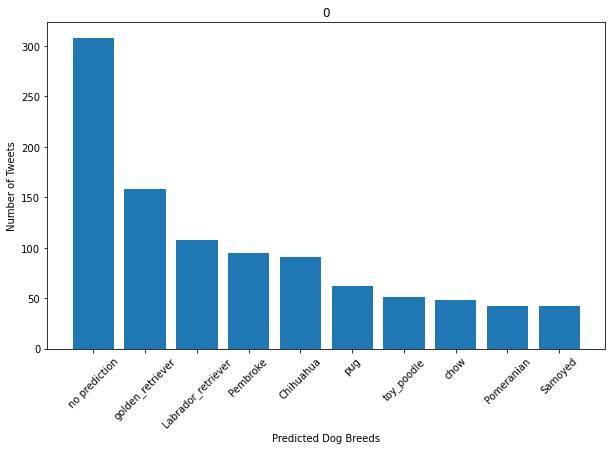

In [77]:
x = breed_dist.index

height = breed_dist.tweet_id


plt.figure(figsize = (10,6))

plt.bar(x = x, tick_label= x, height = height)
plt.xticks(rotation=45)

plt.xlabel('Predicted Dog Breeds')
plt.ylabel('Number of Tweets')

plt.title("0");